High level analysis:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet(
    "https://storage.googleapis.com/birdclef-eda-f22/data/processed/birdnet/birdnet_analyze_v1.parquet"
)
display(df.head())
print(
    f"Total number of small 3 second piece audio: {len(df)}"
)  # 280252 small pieces of audio
print(f"Total number of individual file:", df["filename"].nunique())

,start_sec,end_sec,confidence,birdnet_label,birdnet_common_name,filename
0,0.0,3.0,0.9030,afrsil1,African Silverbill,afrsil1/XC125458.ogg
1,0.0,3.0,0.4720,indsil,Indian Silverbill,afrsil1/XC125458.ogg
2,3.0,6.0,0.7311,afrsil1,African Silverbill,afrsil1/XC125458.ogg
3,6.0,9.0,0.5888,afrsil1,African Silverbill,afrsil1/XC125458.ogg
0,0.0,3.0,0.7585,whsflu1,White-spotted Flufftail,afrsil1/XC175522.ogg


Total number of small 3 second piece audio: 280252
Total number of individual file: 14608


Bird species anlaysis:

,birdnet_common_name,count
1345,House Sparrow,9126
953,Eurasian Skylark,6925
1738,Northern Mockingbird,5868
1725,Northern Cardinal,4680
165,Barn Owl,4137
544,Canada Goose,4125
1587,Mallard,4096
2756,Western Meadowlark,4021
1344,House Finch,3758
755,Common Sandpiper,3686


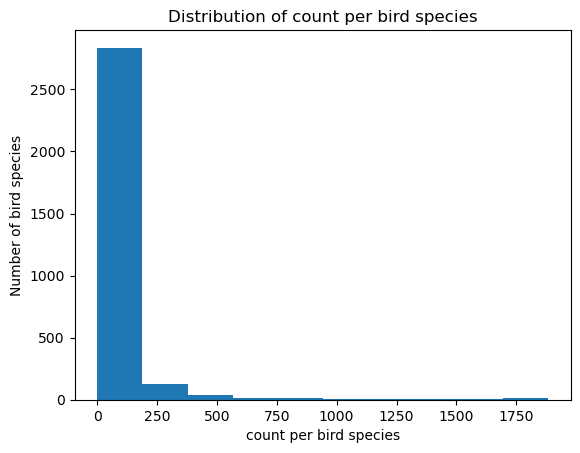

In [6]:
# Bird species anlaysis:
bird_spe = (
    df.groupby("birdnet_common_name")
    .size()
    .reset_index(name="count")
    .sort_values(by=["count"], ascending=False)
)
display(bird_spe.head(10))
plt.hist(bird_spe[bird_spe["count"] < 2000]["count"])
plt.xlabel("count per bird species")
plt.ylabel("Number of bird species")
plt.title("Distribution of count per bird species")
plt.show()
# Comment:
# traning data contains 3083 unique species, top 3 common species are House Sparrow, Eurasian Skylark, Northern Mockingbird
# the identification frequency of most bird species is under 250

Confidence anlaysis

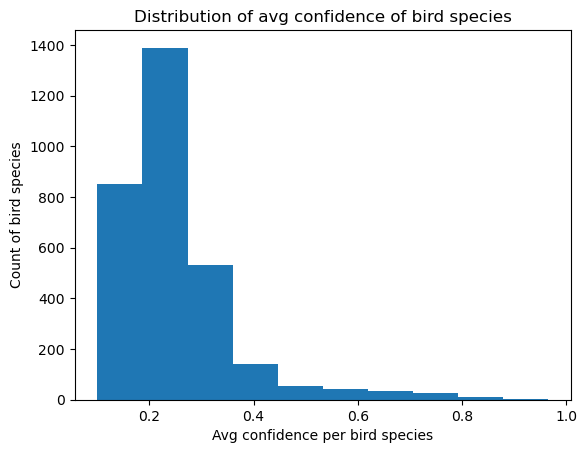

 4.25 % of bird species whose confidence is larger than 0.5


In [13]:
bird_conf = (
    df.groupby("birdnet_common_name")["confidence"]
    .mean()
    .reset_index(name="avg conf")
    .sort_values(by=["avg conf"], ascending=False)
)
plt.hist(bird_conf["avg conf"])
plt.xlabel("Avg confidence per bird species")
plt.ylabel("Count of bird species")
plt.title("Distribution of avg confidence of bird species")
plt.show()
conf05 = len(bird_conf[bird_conf["avg conf"] > 0.5]) / len(
    bird_spe
)  # proportion of bird species whose confidence is larger than 0.5
print(f"{conf05*100: .2f} % of bird species whose confidence is larger than 0.5")

,birdnet_common_name,count,avg conf
0,House Sparrow,9126,0.424709
1,Eurasian Skylark,6925,0.629225
2,Northern Mockingbird,5868,0.412637
3,Northern Cardinal,4680,0.559305
4,Barn Owl,4137,0.747095
5,Canada Goose,4125,0.625478
6,Mallard,4096,0.561048
7,Western Meadowlark,4021,0.549890
8,House Finch,3758,0.556682
9,Common Sandpiper,3686,0.857731


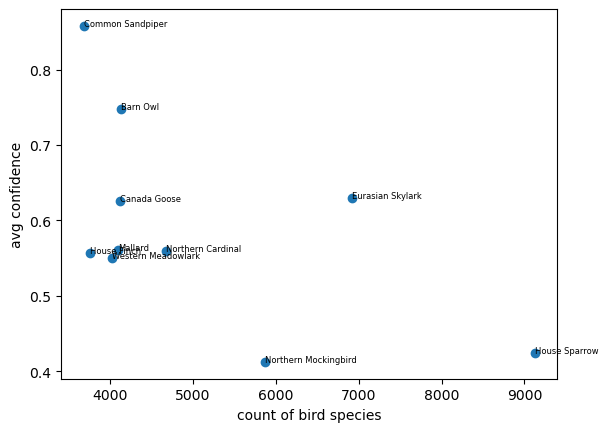

In [49]:
top10bird = bird_spe.head(10)
bird_conf10 = bird_conf[
    bird_conf["birdnet_common_name"].isin(top10bird["birdnet_common_name"].values)
]
top10bird = top10bird.merge(bird_conf10, on="birdnet_common_name")
display(top10bird)

plt.scatter(top10bird["count"], top10bird["avg conf"])
for i, txt in enumerate(top10bird["birdnet_common_name"].values):
    plt.annotate(txt, (top10bird["count"][i], top10bird["avg conf"][i]), fontsize=6)
plt.xlabel("count of bird species")
plt.ylabel("avg confidence")
plt.show()

Merge with Metadata

In [14]:
train_meta = pd.read_csv(
    "https://storage.googleapis.com/birdclef-eda-f22/data/raw/birdclef-2022/train_metadata.csv"
)
display(train_meta.head())

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


In [22]:
df_meta = train_meta[
    ["filename", "primary_label", "common_name", "type", "rating", "time"]
]
df_meta.head()

,filename,primary_label,common_name,type,rating,time
0,afrsil1/XC125458.ogg,afrsil1,African Silverbill,"['call', 'flight call']",2.5,08:00
1,afrsil1/XC175522.ogg,afrsil1,African Silverbill,['call'],3.5,08:30
2,afrsil1/XC177993.ogg,afrsil1,African Silverbill,"['call', 'song']",4.0,11:30
3,afrsil1/XC205893.ogg,afrsil1,African Silverbill,"['alarm call', 'call']",4.0,11:00
4,afrsil1/XC207431.ogg,afrsil1,African Silverbill,['flight call'],3.0,16:30


In [26]:
df_merge = df.merge(df_meta, on="filename")
df_merge.head()

,start_sec,end_sec,confidence,birdnet_label,birdnet_common_name,filename,primary_label,common_name,type,rating,time
0,0.0,3.0,0.9030,afrsil1,African Silverbill,afrsil1/XC125458.ogg,afrsil1,African Silverbill,"['call', 'flight call']",2.5,08:00
1,0.0,3.0,0.4720,indsil,Indian Silverbill,afrsil1/XC125458.ogg,afrsil1,African Silverbill,"['call', 'flight call']",2.5,08:00
2,3.0,6.0,0.7311,afrsil1,African Silverbill,afrsil1/XC125458.ogg,afrsil1,African Silverbill,"['call', 'flight call']",2.5,08:00
3,6.0,9.0,0.5888,afrsil1,African Silverbill,afrsil1/XC125458.ogg,afrsil1,African Silverbill,"['call', 'flight call']",2.5,08:00
4,0.0,3.0,0.7585,whsflu1,White-spotted Flufftail,afrsil1/XC175522.ogg,afrsil1,African Silverbill,['call'],3.5,08:30


,birdnet_common_name,count,avg conf,rating
0,House Sparrow,9126,0.424709,3.436984
1,Eurasian Skylark,6925,0.629225,3.699650
2,Northern Mockingbird,5868,0.412637,4.044262
3,Northern Cardinal,4680,0.559305,3.844564
4,Barn Owl,4137,0.747095,4.113425
5,Canada Goose,4125,0.625478,3.819323
6,Mallard,4096,0.561048,3.993930
7,Western Meadowlark,4021,0.549890,4.079899
8,House Finch,3758,0.556682,3.992600
9,Common Sandpiper,3686,0.857731,3.856623


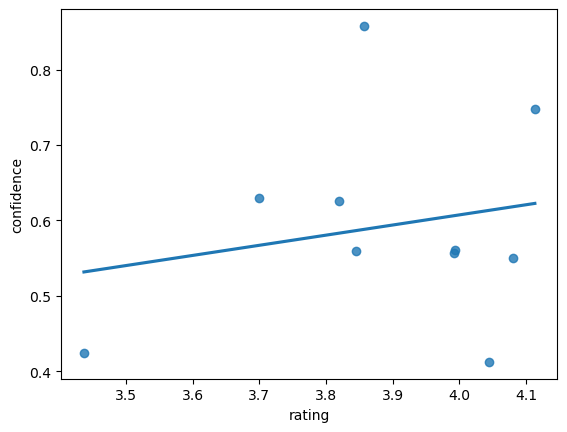

,birdnet_common_name,count,avg conf,rating,predict confidence
1,Eurasian Skylark,6925,0.629225,3.699650,0.567080
4,Barn Owl,4137,0.747095,4.113425,0.622623
5,Canada Goose,4125,0.625478,3.819323,0.583144
9,Common Sandpiper,3686,0.857731,3.856623,0.588151


In [114]:
import seaborn as sns
import numpy as np

toptenbird = top10bird["birdnet_common_name"].values

topten_mean_rating = (
    df_merge[df_merge["common_name"].isin(toptenbird)]
    .groupby("common_name")["rating"]
    .mean()
    .reset_index()
)
topten_mean_rating = topten_mean_rating.rename(
    columns={"common_name": "birdnet_common_name"}
)

top10bird_all = top10bird.merge(topten_mean_rating, on="birdnet_common_name")
display(top10bird_all)

# top 10 bird: confidence vs. rating
sns.regplot(data=top10bird_all, x="rating", y="avg conf", ci=None)
plt.ylabel("confidence")
plt.xlabel("rating")
plt.show()

m, b = np.polyfit(top10bird_all["rating"], top10bird_all["avg conf"], 1)
conf_pre = m * top10bird_all["rating"] + b
top10bird_all["predict confidence"] = conf_pre

sel = top10bird_all["predict confidence"] < top10bird_all["avg conf"]
top10_aboveconf = top10bird_all[sel]
top10_aboveconf

Comment: Common Sandpiper has extremely high average confidence compared with the predicted confidence based on the rating of audio

Single bird anlaysis:
- Common Sandpiper




In [83]:
sel = df_merge["common_name"] == "Common Sandpiper"
df_merge[sel].groupby(["common_name", "birdnet_common_name"]).agg(
    {"type": "size", "confidence": "mean"}
).rename(columns={"type": "count", "confidence": "avg_conf"}).reset_index().sort_values(
    by="count", ascending=False
)
# common_name is a bird name given by the author of audio
# birdnet_common_name is a bird name identified by model

,common_name,birdnet_common_name,count,avg_conf
95,Common Sandpiper,Common Sandpiper,3612,0.864855
179,Common Sandpiper,Green Sandpiper,81,0.556879
398,Common Sandpiper,Wood Sandpiper,61,0.309151
323,Common Sandpiper,Solitary Sandpiper,60,0.199650
140,Common Sandpiper,European Pied Flycatcher,30,0.319013
...,...,...,...,...
261,Common Sandpiper,Pine Grosbeak,1,0.175600
99,Common Sandpiper,Common Tailorbird,1,0.199100
263,Common Sandpiper,Plain Prinia,1,0.227500
96,Common Sandpiper,Common Scoter,1,0.100600


In [90]:
# create a df which contains main bird and its accompanied bird info
bird_tog = (
    df_merge.groupby(["common_name", "birdnet_common_name"])
    .agg({"type": "size", "confidence": "mean"})
    .rename(columns={"type": "count", "confidence": "avg_conf"})
    .reset_index()
    .sort_values(by="count", ascending=False)
)
bird_tog.head()

,common_name,birdnet_common_name,count,avg_conf
12279,House Sparrow,House Sparrow,8684,0.432880
8349,Eurasian Skylark,Eurasian Skylark,6816,0.634708
17614,Northern Mockingbird,Northern Mockingbird,5762,0.416219
16403,Northern Cardinal,Northern Cardinal,4519,0.568808
826,Barn Owl,Barn Owl,3933,0.768714


In [124]:
sel = bird_tog["common_name"] == "Common Sandpiper"
cs = bird_tog[sel].sort_values(by="count", ascending=False)

Bird Family

In [82]:
taxonomy_df = pd.read_csv(
    "https://storage.googleapis.com/birdclef-eda-f22/data/raw/birdclef-2022/eBird_Taxonomy_v2021.csv"
)
taxonomy_df.columns = taxonomy_df.columns.str.lower()
taxonomy_df.head()

,taxon_order,category,species_code,primary_com_name,sci_name,order1,family,species_group,report_as
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [105]:
family = taxonomy_df[["primary_com_name", "family"]].rename(
    columns={"primary_com_name": "birdnet_common_name"}
)
family

,birdnet_common_name,family
0,Common Ostrich,Struthionidae (Ostriches)
1,Somali Ostrich,Struthionidae (Ostriches)
2,Common/Somali Ostrich,Struthionidae (Ostriches)
3,Greater Rhea,Rheidae (Rheas)
4,Lesser Rhea,Rheidae (Rheas)
...,...,...
16748,Slate-colored Grosbeak,Thraupidae (Tanagers and Allies)
16749,Black-throated Grosbeak,Thraupidae (Tanagers and Allies)
16750,saltator sp.,Thraupidae (Tanagers and Allies)
16751,passerine sp.,NaN


In [126]:
cs_family = cs.merge(family, on="birdnet_common_name")
cs_family.groupby("family")["count"].sum().reset_index().sort_values(
    by="count", ascending=False
)
cs_family["countper"] = cs_family["count"] / cs["count"].sum()
cs_family

,common_name,birdnet_common_name,count,avg_conf,family,countper
0,Common Sandpiper,Common Sandpiper,3612,0.864855,Scolopacidae (Sandpipers and Allies),0.709906
1,Common Sandpiper,Green Sandpiper,81,0.556879,Scolopacidae (Sandpipers and Allies),0.015920
2,Common Sandpiper,Wood Sandpiper,61,0.309151,Scolopacidae (Sandpipers and Allies),0.011989
3,Common Sandpiper,Solitary Sandpiper,60,0.199650,Scolopacidae (Sandpipers and Allies),0.011792
4,Common Sandpiper,European Pied Flycatcher,30,0.319013,Muscicapidae (Old World Flycatchers),0.005896
...,...,...,...,...,...,...
385,Common Sandpiper,Iberian Chiffchaff,1,0.133000,Phylloscopidae (Leaf Warblers),0.000197
386,Common Sandpiper,Horned Lark,1,0.240200,Alaudidae (Larks),0.000197
387,Common Sandpiper,Hooded Yellowthroat,1,0.103200,Parulidae (New World Warblers),0.000197
388,Common Sandpiper,Himalayan Bulbul,1,0.161500,Pycnonotidae (Bulbuls),0.000197


In [128]:
cs_family.groupby("family")["countper"].sum().reset_index().sort_values(
    by="countper", ascending=False
)

,family,countper
75,Scolopacidae (Sandpipers and Allies),0.769458
46,Muscicapidae (Old World Flycatchers),0.026533
39,"Laridae (Gulls, Terns, and Skimmers)",0.017885
92,Tyrannidae (Tyrant Flycatchers),0.012186
6,"Anatidae (Ducks, Geese, and Waterfowl)",0.011792
...,...,...
61,Pipridae (Manakins),0.000197
65,Procellariidae (Shearwaters and Petrels),0.000197
67,Pteroclidae (Sandgrouse),0.000197
68,Pycnonotidae (Bulbuls),0.000197


In [119]:
cs_otherbird = (
    cs.iloc[1:, :]
    .groupby("family")["count"]
    .sum()
    .reset_index()
    .sort_values(by="count", ascending=False)
)
cs_otherbirdsum = cs.iloc[1:, 2].sum()
cs_otherbird["countper"] = cs_otherbird["count"] / cs_otherbirdsum
cs_otherbird.head()

,family,count,countper
75,Scolopacidae (Sandpipers and Allies),303,0.210125
46,Muscicapidae (Old World Flycatchers),135,0.093620
39,"Laridae (Gulls, Terns, and Skimmers)",91,0.063107
92,Tyrannidae (Tyrant Flycatchers),62,0.042996
6,"Anatidae (Ducks, Geese, and Waterfowl)",60,0.041609


In [129]:
cs_otherbird.head(5)["family"]

75      Scolopacidae (Sandpipers and Allies)
46      Muscicapidae (Old World Flycatchers)
39      Laridae (Gulls, Terns, and Skimmers)
92           Tyrannidae (Tyrant Flycatchers)
6     Anatidae (Ducks, Geese, and Waterfowl)
Name: family, dtype: object

"'\nplt.bar(cs_otherbird.head(10)['family'], cs_otherbird.head(10)['countper'])\n\nplt.show()\n"

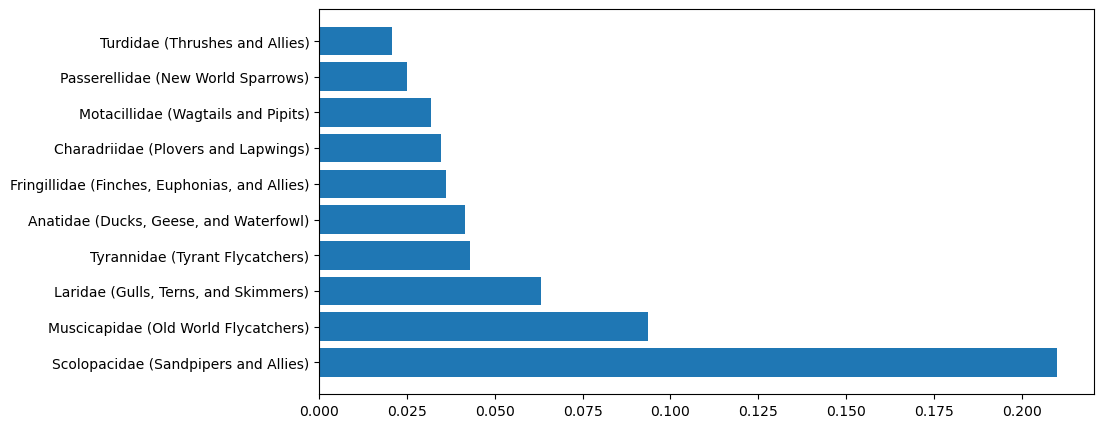

In [138]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(cs_otherbird.head(10)["family"], cs_otherbird.head(10)["countper"])

"""'
plt.bar(cs_otherbird.head(10)['family'], cs_otherbird.head(10)['countper'])

plt.show()
"""

Comment: The birds belonging to the same bird family as common sandpiper are more likely to appear in the same audio file with common sandpiper

In [136]:
cs_otherbird.head(10)["family"]

75             Scolopacidae (Sandpipers and Allies)
46             Muscicapidae (Old World Flycatchers)
39             Laridae (Gulls, Terns, and Skimmers)
92                  Tyrannidae (Tyrant Flycatchers)
6            Anatidae (Ducks, Geese, and Waterfowl)
32    Fringillidae (Finches, Euphonias, and Allies)
18              Charadriidae (Plovers and Lapwings)
45               Motacillidae (Wagtails and Pipits)
54               Passerellidae (New World Sparrows)
90                   Turdidae (Thrushes and Allies)
Name: family, dtype: object

In [97]:
sel = bird_tog["birdnet_common_name"] == "Common Sandpiper"
bird_tog[sel].sort_values(by=["avg_conf"], ascending=False)

,common_name,birdnet_common_name,count,avg_conf
6939,Common Sandpiper,Common Sandpiper,3612,0.864855
8713,Eurasian Wigeon,Common Sandpiper,27,0.729189
24247,Sanderling,Common Sandpiper,2,0.713350
23448,Ruddy Turnstone,Common Sandpiper,2,0.712600
538,Arctic Tern,Common Sandpiper,7,0.635643
14679,Mallard,Common Sandpiper,3,0.511233
5093,Cattle Egret,Common Sandpiper,6,0.455133
25837,Spotted Sandpiper,Common Sandpiper,2,0.381200
3067,Blue-winged Teal,Common Sandpiper,3,0.343767
18351,Northern Shoveler,Common Sandpiper,3,0.271800


Text(0.5, 1.0, 'Simple plot')

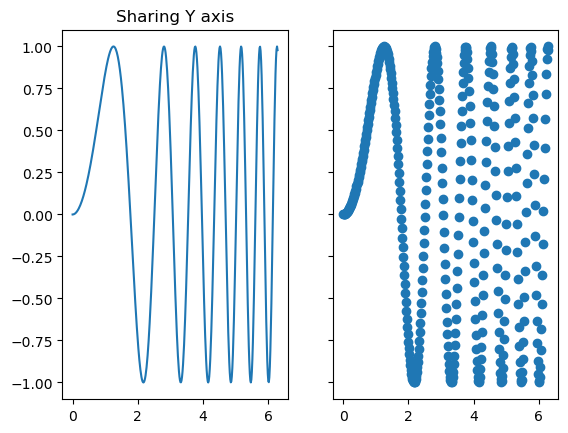

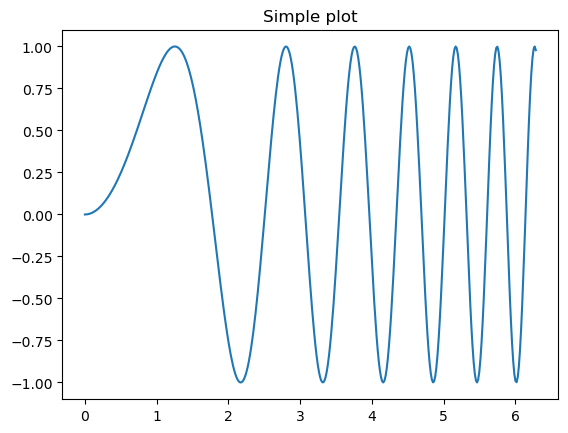

In [132]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x**2)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title("Sharing Y axis")
ax2.scatter(x, y)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Simple plot")